In [1]:
import pandas as pd
import numpy as np

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

from sklearn.preprocessing import OneHotEncoder

In [2]:
f = pd.read_csv('/Users/danherman/Desktop/oud_treatment_outcome/data/clean_data/fe.csv')

f[:5]

,patdeid,VISIT,medication,total_dose,admin_location,sru_alcohol,alc_qty,sru_cannabis,sru_cocaine,sru_amphetamine,sru_methamphetamine,sru_opiates,sru_benzodiazepines,sru_propoxyphene,sru_methadone,sru_oxycodone,sru_other,t_alcohol,alc_result,urine_test,refuse_reason,other_reason,urine_temp,supervised,t_Amphetamines,t_Benzodiazapines,t_Methadone,t_Oxycodone,t_Cocaine,t_Methamphetamine,t_Opiate300,t_Cannabinoids,t_Propoxyphene,w_21,w_22,w_23,w_24,c_tests,outcome,c_t
0,1,0,2.0,8.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,1,2.0,16.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,2,2.0,32.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,3,2.0,32.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,4,2.0,32.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
# for alc_result colum if value is greater than 0, then 1.0 else 0.0

f['alc_result'] = np.where(f['alc_result'] > 0, 1.0, 0.0)

f = f.rename(columns={'alc_result': 'alc_result_pos'})

In [4]:
# examine unique values for total_dose column

f.total_dose.nunique()

148

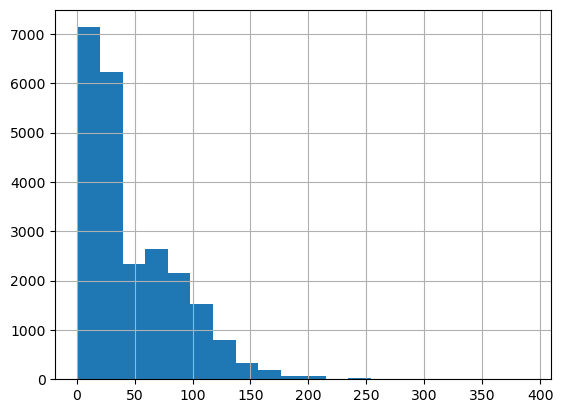

In [5]:
# examine distribution of total_dose column

f.total_dose.hist(bins=20);

In [6]:
# examine bin structure for total_dose column

pd.cut(f.total_dose, bins=5).value_counts()

total_dose
(0.611, 78.8]     18347
(78.8, 156.6]      4809
(156.6, 234.4]      331
(234.4, 312.2]       31
(312.2, 390.0]       10
Name: count, dtype: int64

In [7]:
# execute binning for values, will turn to columns with ohe later

f.total_dose = pd.cut(f.total_dose, bins=[0,78,156,234,312,390], labels=['0-78','78-156','156-234','234-312','312-390'])

In [12]:
# setup one hot encoder for the following columns: 'VISIT','medication','total_dose','admin_location'

ohe = OneHotEncoder(sparse_output=True)

# fit the encoder to the data
ohe.fit(f[['VISIT','medication','total_dose','admin_location']])


# transform the data
ohe.transform(f[['VISIT','medication','total_dose','admin_location']])

# create a new dataframe with the encoded columns
o = pd.DataFrame(ohe.transform(f[['VISIT','medication','total_dose','admin_location']]).toarray(), columns=ohe.get_feature_names_out())

In [13]:
# merge ohe with f and drop the original columns

f = pd.concat([f,o], axis=1)

f.drop(columns=['VISIT','medication','total_dose','admin_location'], inplace=True)

In [14]:
# after running a few models, we decided to drop these columns

to_drop =['alc_qty','t_alcohol','urine_test','refuse_reason','other_reason','urine_temp','supervised']

In [15]:
# execute drop

f.drop(columns=to_drop, inplace=True)

In [20]:
f[:25]

,patdeid,sru_alcohol,sru_cannabis,sru_cocaine,sru_amphetamine,sru_methamphetamine,sru_opiates,sru_benzodiazepines,sru_propoxyphene,sru_methadone,sru_oxycodone,sru_other,alc_result,t_Amphetamines,t_Benzodiazapines,t_Methadone,t_Oxycodone,t_Cocaine,t_Methamphetamine,t_Opiate300,t_Cannabinoids,t_Propoxyphene,w_21,w_22,w_23,w_24,c_tests,outcome,c_t,VISIT_0,VISIT_1,VISIT_2,VISIT_3,VISIT_4,VISIT_5,VISIT_6,VISIT_7,VISIT_8,VISIT_9,VISIT_10,VISIT_11,VISIT_12,VISIT_13,VISIT_14,VISIT_15,VISIT_16,VISIT_17,VISIT_18,VISIT_19,VISIT_20,VISIT_21,VISIT_22,VISIT_23,VISIT_24,medication_1.0,medication_2.0,total_dose_0-78,total_dose_156-234,total_dose_234-312,total_dose_312-390,total_dose_78-156,admin_location_1.0,admin_location_2.0
0,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
5,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-5.0,-5.0,-5.0,-5.0,-5.0,-5.0,-5.0,-5.0,-5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
6,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
7,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
8,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
9,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [21]:
f.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23528 entries, 0 to 23527
Data columns (total 63 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   patdeid              23528 non-null  int64  
 1   sru_alcohol          23528 non-null  float64
 2   sru_cannabis         23528 non-null  float64
 3   sru_cocaine          23528 non-null  float64
 4   sru_amphetamine      23528 non-null  float64
 5   sru_methamphetamine  23528 non-null  float64
 6   sru_opiates          23528 non-null  float64
 7   sru_benzodiazepines  23528 non-null  float64
 8   sru_propoxyphene     23528 non-null  float64
 9   sru_methadone        23528 non-null  float64
 10  sru_oxycodone        23528 non-null  float64
 11  sru_other            23528 non-null  float64
 12  alc_result           23528 non-null  float64
 13  t_Amphetamines       23528 non-null  float64
 14  t_Benzodiazapines    23528 non-null  float64
 15  t_Methadone          23528 non-null 

In [22]:
# data is ready for modeling
f.to_csv('/Users/danherman/Desktop/oud_treatment_outcome/data/clean_data/final.csv', index=False)